# Evaluation of Results

In the following we showcase some of our results. We tried different Network Architecutures with different parameters and settings.

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from scipy.interpolate import interp1d

In [154]:
#Simple Moving average to flatten curves and to identify trends
def maverage(values, window):
    weights = np.repeat(1.0, window)/window
    return np.convolve(values, weights, 'valid')

### Feed Forward Neural Network
Different Agents with the same 64x64-FFNN-Architecture

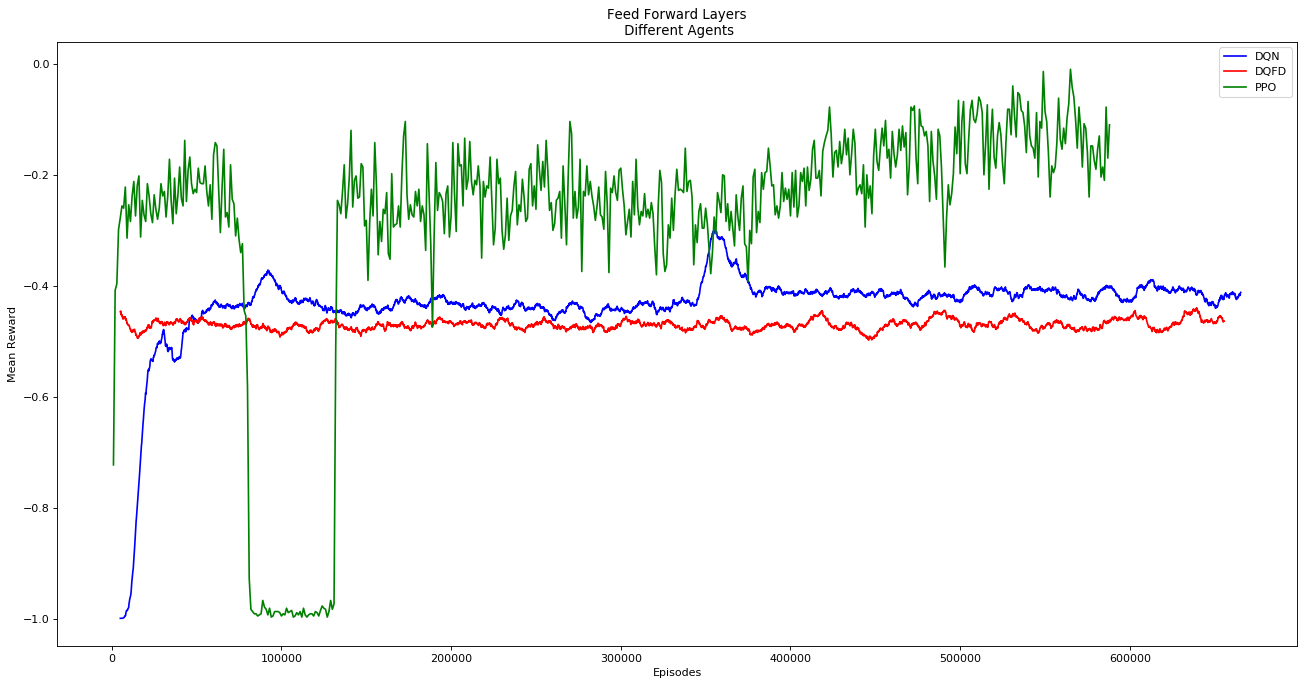

In [145]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

Averaging=True
Interpolation=False

df1 = pd.read_csv('log_dqn_1m.csv')
df2 = pd.read_csv('log_dqfd_1m.csv')
df3 = pd.read_csv('log_ppo_500k.csv')

ep1, ep2, ep3 = df1['episodes'], df2['episodes'], df3['Timestep']
re1, re2, re3  = df1['mean reward'], df2['mean reward'], df3['Mean']

#Averaging
if Averaging:
    wdw = 100
    ep1, ep2, ep3 = maverage(ep1, wdw), maverage(ep2, wdw), maverage(ep3, 1)
    re1, re2, re3 = maverage(re1, wdw), maverage(re2, wdw), maverage(re3, 1)

#Interpolation
if Interpolation:
    num = 1e2
    f1 = interp1d(ep1, re1)
    f2 = interp1d(ep2, re2)
    f3 = interp1d(ep3, re3)

    ep1 = np.linspace(ep1.min(), ep1.max(), num=num, endpoint=True)
    ep2 = np.linspace(ep2.min(), ep2.max(), num=num, endpoint=True)
    ep3 = np.linspace(ep3.min(), ep3.max(), num=num, endpoint=True)

    re1 = f1(ep1)
    re2 = f2(ep2)
    re3 = f3(ep3)


#Plot the Graph
plt.plot(ep1, re1, 'b', ep2, re2, 'r', ep3, re3, 'g')

#Additional Settings
#plt.ylim(-1, 1)
#plt.xscale('log')

plt.legend(['DQN', 'DQFD', 'PPO'], loc='best')
plt.xlabel('Episodes'), plt.ylabel('Mean Reward')
plt.title('Feed Forward Layers\n Different Agents')
plt.show()

### Convolutional Layers - Learning rate

PPO Agent, different learning rates

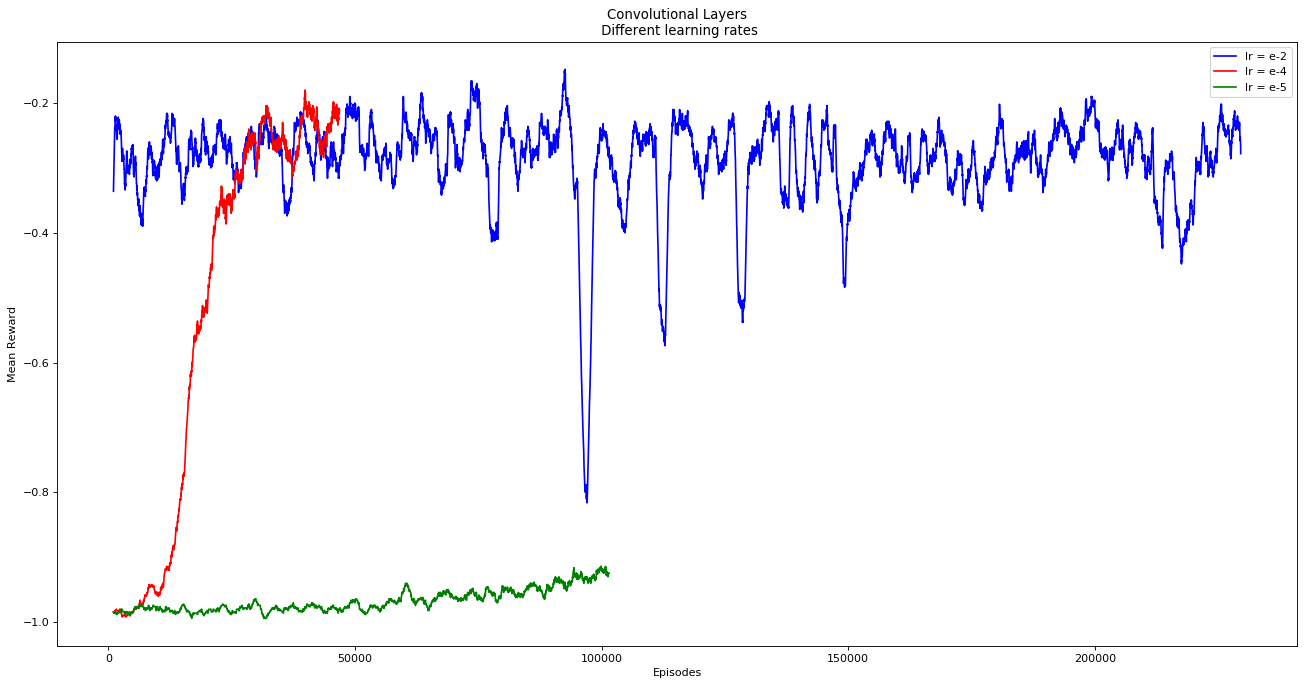

In [150]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

Averaging=True
Interpolation=False

df1 = pd.read_csv('log_conv_ppo_lre2.csv')
df2 = pd.read_csv('log_conv_ppo_lre4.csv')
df3 = pd.read_csv('log_conv_ppo_lre5.csv')

ep1, ep2, ep3 = df1['episodes'], df2['episodes'], df3['episodes']
re1, re2, re3  = df1['mean reward'], df2['mean reward'], df3['mean reward']


#Averaging
if Averaging:
    wdw = 100
    ep1, ep2, ep3 = maverage(ep1, wdw), maverage(ep2, wdw), maverage(ep3, wdw)
    re1, re2, re3 = maverage(re1, wdw), maverage(re2, wdw), maverage(re3, wdw)


#Interpolation
if Interpolation:
    num = 1e2
    f1 = interp1d(ep1, re1)
    f2 = interp1d(ep2, re2)
    f3 = interp1d(ep3, re3)

    ep1 = np.linspace(ep1.min(), ep1.max(), num=num, endpoint=True)
    ep2 = np.linspace(ep2.min(), ep2.max(), num=num, endpoint=True)
    ep3 = np.linspace(ep3.min(), ep3.max(), num=num, endpoint=True)

    re1 = f1(ep1)
    re2 = f2(ep2)
    re3 = f3(ep3)


#Plot the Graph
plt.plot(ep1, re1, 'b', ep2, re2, 'r', ep3, re3, 'g')

#Additional Settings
#plt.ylim(-1, 1)
#plt.xscale('log')

plt.legend(['lr = e-2', 'lr = e-4', 'lr = e-5'], loc='best')
plt.xlabel('Episodes'), plt.ylabel('Mean Reward')
plt.title('Convolutional Layers\n Different learning rates')
plt.show()

### Convolutional Layers - Centering 
Same Convolutional Architecture - Centering vs no Centering

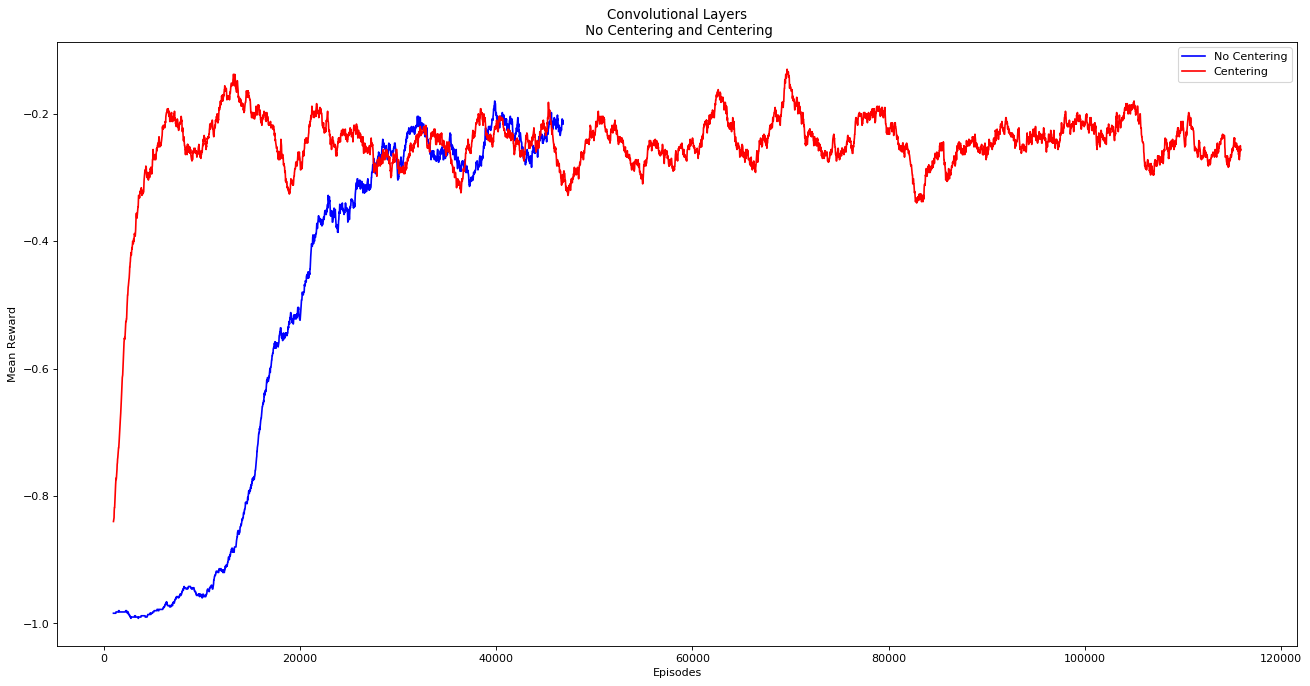

In [156]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

Averaging=True
Interpolation=False

df1 = pd.read_csv('log_conv_ppo_lre4.csv')
df2 = pd.read_csv('log_conv_ppo_center_lre3.csv')

ep1, ep2  = df1['episodes'], df2['episodes']
re1, re2  = df1['mean reward'], df2['mean reward']


#Averaging
if Averaging:
    wdw = 100
    ep1, ep2 = maverage(ep1, wdw), maverage(ep2, wdw)
    re1, re2 = maverage(re1, wdw), maverage(re2, wdw)


#Interpolation
if Interpolation:
    num = 1e2
    f1 = interp1d(ep1, re1)
    f2 = interp1d(ep2, re2)

    ep1 = np.linspace(ep1.min(), ep1.max(), num=num, endpoint=True)
    ep2 = np.linspace(ep2.min(), ep2.max(), num=num, endpoint=True)

    re1 = f1(ep1)
    re2 = f2(ep2)

#Plot the Graph
plt.plot(ep1, re1, 'b', ep2, re2, 'r')

#Additional Settings
#plt.ylim(-1, 1)
#plt.xscale('log')
    
plt.legend(['No Centering', 'Centering'], loc='best')
plt.xlabel('Episodes'), plt.ylabel('Mean Reward')
plt.title('Convolutional Layers\n No Centering and Centering')
plt.show()